In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255


In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
model = Sequential([
Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D(pool_size=(2, 2)),
Conv2D(64, kernel_size=(3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Flatten(),
Dense(128, activation='relu'),
Dense(10, activation='softmax')
])


c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9977 - loss: 0.0067 - val_accuracy: 0.9886 - val_loss: 0.0551
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9980 - loss: 0.0051 - val_accuracy: 0.9887 - val_loss: 0.0697
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9895 - val_loss: 0.0637
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accuracy: 0.9913 - val_loss: 0.0515
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9985 - loss: 0.0040 - val_accuracy: 0.9901 - val_loss: 0.0584
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9985 - loss: 0.0048 - val_accuracy: 0.9905 - val_loss: 0.0602
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.9918 - val_loss: 0.0438
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9994 -

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9882 - loss: 0.0470
Accuracy: 0.9908000230789185


In [10]:
dict_data = history.history

dict_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [14]:
import matplotlib.pyplot as plt

In [15]:
accuracy = dict_data['accuracy']
val_accuracy = dict_data['val_accuracy']
loss = dict_data['loss']
val_loss = dict_data['val_loss']

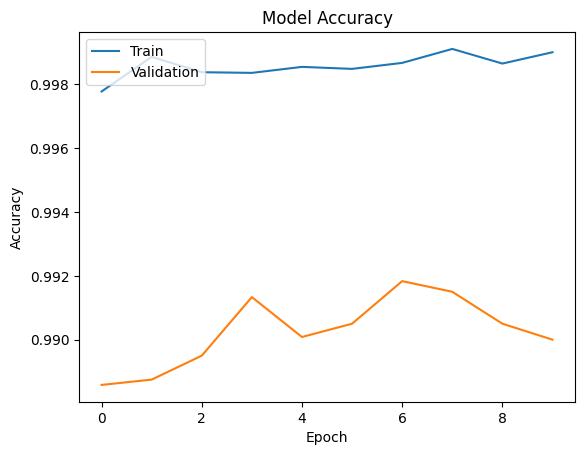

In [16]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

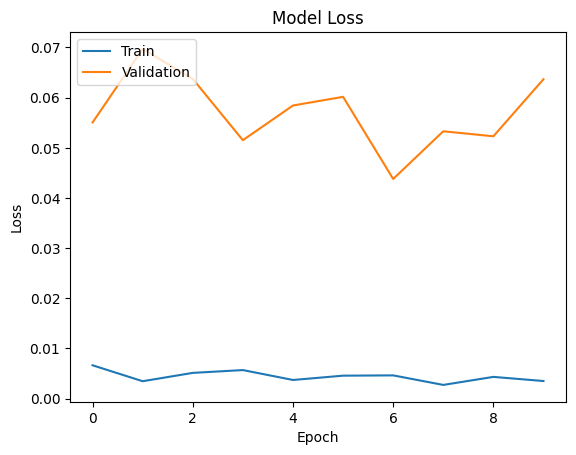

In [17]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()